## K-means
Dentro de las tecnicas no supervisadas estan los algoritmos de clusterizacion. Que consiste en agrupar los elementos que tienen similaridad.

### Cuando utilizar un clusters?
Normalmente se utilizan cuando no tenemos etiquetas de los datos para predecir. En este caso se busca agrupar la informacion en grupos que pueden ser utilizados para conocer la posible etiqueta de los datos.

### Algoritmo
1 Seleccionar K, numero de grupos en los datos.

2 Asignar los datos a un cluster o grupo aleatorio

3 Calcular el centroide. Este es el el promedio de todos los puntos.

4 Medir la distancia del punto a cada centroide y asignar el cluster mas cercano como etiqueta.

5 Si no existe ningun cambio en la asignacion, el algoritmo finalizo. Sino volver al paso 3 


El Objetivo es minimizar la distancia entre los puntos asignados al grupo y el centroide.

$Min(\sum^{i \in K}_{i=0}\sum_{x \in S_i}(X-\mu_i)^2 )$

### 1 k-means

In [36]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

from sklearn.model_selection import train_test_split

In [29]:
d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())
X = np.array(X)

In [31]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()

def plot_5_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()

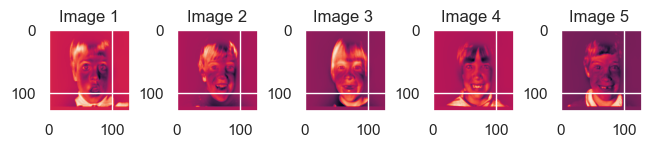

In [32]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_5_images(X_center,1, 2 ,3,4,5)

In [33]:
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X_center)


eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [34]:
def CalculoPorcentaje(porcentage, eingen_values):
    actual =0
    suma=0
    for a in range(len(eingen_values)):
        suma = suma + eingen_values[a]
    for i in range(len(eingen_values)):
        actual =  actual +  eingen_values[i]/suma
        if actual>= porcentage:
            return i
val_90_porciento = CalculoPorcentaje(0.9,eigen_values)
val_99_porciento = CalculoPorcentaje(0.99,eigen_values)

print(val_90_porciento)
print(val_99_porciento)

45
161


In [35]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

### Aprender de los datos train - predict

Explained variation per principal component: 0.07692307692307702


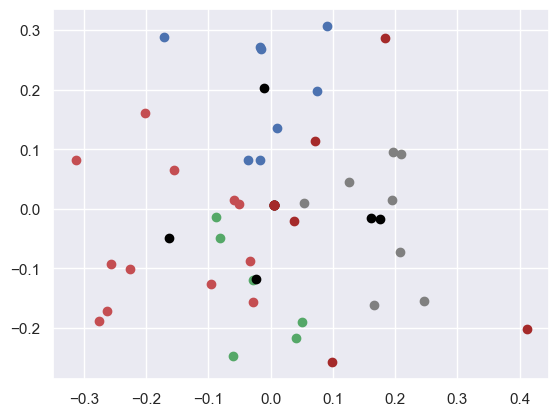

In [37]:
def reduce_dim_pca(components, X_train, X_test):
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    text = 'Explained variation per principal component: {}'
    print(text.format(np.sum(pca.explained_variance_ratio_[:components])))
    return X_r, X_nr
faces_test, faces_train = train_test_split(eigen_faces, test_size= 0.2)
X_r, X_nr = reduce_dim_pca(3,faces_train,faces_test)



fig, ax = plt.subplots(1,1)
kmeans = Kmeans(5)
kmeans.train(X_r)
label = kmeans.predict(X_r)
 
ax.scatter(X_r[np.where(label==0),0],X_r[np.where(label==0),1],c='r')
ax.scatter(X_r[np.where(label==1),0],X_r[np.where(label==1),1],c='b')
ax.scatter(X_r[np.where(label==2),0],X_r[np.where(label==2),1],c='g')
ax.scatter(X_r[np.where(label==3),0],X_r[np.where(label==3),1],c='gray')
ax.scatter(X_r[np.where(label==4),0],X_r[np.where(label==4),1],c='brown')
ax.scatter(kmeans.mu[:,0], kmeans.mu[:,1], c='black')

In [38]:
print(kmeans.mu)

[[-0.16328338 -0.04939195 -0.09698157]
 [-0.01018688  0.20365551  0.10250942]
 [-0.02314484 -0.11830516  0.19174945]
 [ 0.17516209 -0.0163475   0.0184686 ]
 [ 0.16032256 -0.01552492 -0.22925831]]


In [39]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[0]))

[(38, array([-0.22673652, -0.10155255, -0.13029556])),
 (35, array([-0.0957826 , -0.12537262, -0.12102663])),
 (10, array([-0.05830552,  0.01452566, -0.06431473])),
 (31, array([-0.25582319, -0.09287311,  0.00383814])),
 (28, array([-0.03363393, -0.0873479 , -0.04777686])),
 (14, array([-0.05131631,  0.00838306,  0.01188056])),
 (17, array([-0.02884023, -0.15655514, -0.07722401])),
 (34, array([-0.275781  , -0.18798344, -0.07652891])),
 (16, array([-0.26317884, -0.1720919 , -0.20958314])),
 (33, array([-0.15475844,  0.06450418, -0.30287684])),
 (18, array([-0.20230029,  0.16130955, -0.19493446])),
 (24, array([ 0.03682138, -0.02108131, -0.22032874])),
 (4, array([-0.31294371,  0.08235078,  0.04506365])),
 (7, array([0.05388991, 0.01011302, 0.03525359])),
 (22, array([-0.01656671,  0.08138968,  0.10180531])),
 (32, array([-0.08120118, -0.04937801,  0.17548783])),
 (23, array([-0.02818082, -0.12003023,  0.15374553])),
 (1, array([ 0.04053506, -0.2169765 ,  0.05312354])),
 (36, array([ 0.

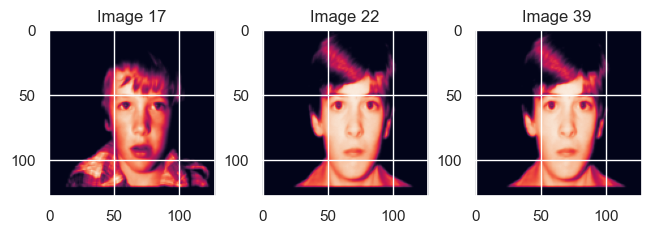

In [64]:
plot_3_images(X,17, 22 , 39)

En las images se puede ver que los ojos son el rasgo que tienen en comun

In [41]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[1]))

[(6, array([-0.01599238,  0.26751808,  0.07828452])),
 (19, array([0.01057716, 0.13519044, 0.11216953])),
 (2, array([0.07410055, 0.19755841, 0.079979  ])),
 (22, array([-0.01656671,  0.08138968,  0.10180531])),
 (12, array([-0.03653448,  0.08162785,  0.19195438])),
 (21, array([0.09024688, 0.3068595 , 0.03783909])),
 (27, array([-0.01666478,  0.27106979,  0.27197096])),
 (7, array([0.05388991, 0.01011302, 0.03525359])),
 (14, array([-0.05131631,  0.00838306,  0.01188056])),
 (8, array([0.19720045, 0.09567758, 0.08307881])),
 (29, array([-0.17066127,  0.28803036, -0.0539274 ])),
 (3, array([-0.08757548, -0.01340599,  0.2017786 ])),
 (10, array([-0.05830552,  0.01452566, -0.06431473])),
 (9, array([0.20967632, 0.09183506, 0.01687398])),
 (36, array([ 0.12626547,  0.04442272, -0.06477083])),
 (32, array([-0.08120118, -0.04937801,  0.17548783])),
 (0, array([0.00564195, 0.00723866, 0.31781492])),
 (30, array([ 0.19439173,  0.01445925, -0.02041836])),
 (23, array([-0.02818082, -0.12003023,

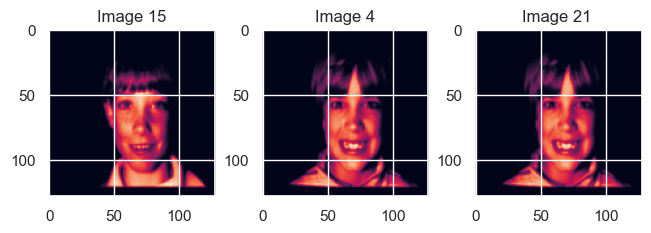

In [60]:
plot_3_images(X,15, 4 , 21)

Para esta imagen se presenta rasgos en comun alrededor de sus ojos y abajo de ellos 

In [43]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[2]))

[(23, array([-0.02818082, -0.12003023,  0.15374553])),
 (32, array([-0.08120118, -0.04937801,  0.17548783])),
 (25, array([ 0.04959661, -0.18920922,  0.1415289 ])),
 (3, array([-0.08757548, -0.01340599,  0.2017786 ])),
 (39, array([-0.06082998, -0.24637481,  0.29876681])),
 (0, array([0.00564195, 0.00723866, 0.31781492])),
 (1, array([ 0.04053506, -0.2169765 ,  0.05312354])),
 (12, array([-0.03653448,  0.08162785,  0.19195438])),
 (7, array([0.05388991, 0.01011302, 0.03525359])),
 (5, array([ 0.16591624, -0.16128396,  0.09450178])),
 (22, array([-0.01656671,  0.08138968,  0.10180531])),
 (14, array([-0.05131631,  0.00838306,  0.01188056])),
 (28, array([-0.03363393, -0.0873479 , -0.04777686])),
 (19, array([0.01057716, 0.13519044, 0.11216953])),
 (17, array([-0.02884023, -0.15655514, -0.07722401])),
 (10, array([-0.05830552,  0.01452566, -0.06431473])),
 (31, array([-0.25582319, -0.09287311,  0.00383814])),
 (11, array([ 0.24666447, -0.15419145,  0.05086755])),
 (35, array([-0.0957826 

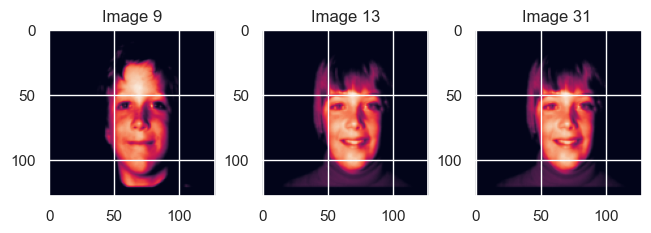

In [73]:
plot_3_images(X,9, 13 , 31)

En esta imagen podemos ver que el ragos en commun son sus mejillas 

In [45]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[3]))

[(30, array([ 0.19439173,  0.01445925, -0.02041836])),
 (15, array([ 0.2072921 , -0.07181223, -0.0476377 ])),
 (9, array([0.20967632, 0.09183506, 0.01687398])),
 (36, array([ 0.12626547,  0.04442272, -0.06477083])),
 (7, array([0.05388991, 0.01011302, 0.03525359])),
 (8, array([0.19720045, 0.09567758, 0.08307881])),
 (11, array([ 0.24666447, -0.15419145,  0.05086755])),
 (5, array([ 0.16591624, -0.16128396,  0.09450178])),
 (14, array([-0.05131631,  0.00838306,  0.01188056])),
 (28, array([-0.03363393, -0.0873479 , -0.04777686])),
 (22, array([-0.01656671,  0.08138968,  0.10180531])),
 (19, array([0.01057716, 0.13519044, 0.11216953])),
 (1, array([ 0.04053506, -0.2169765 ,  0.05312354])),
 (2, array([0.07410055, 0.19755841, 0.079979  ])),
 (25, array([ 0.04959661, -0.18920922,  0.1415289 ])),
 (10, array([-0.05830552,  0.01452566, -0.06431473])),
 (23, array([-0.02818082, -0.12003023,  0.15374553])),
 (17, array([-0.02884023, -0.15655514, -0.07722401])),
 (24, array([ 0.03682138, -0.02

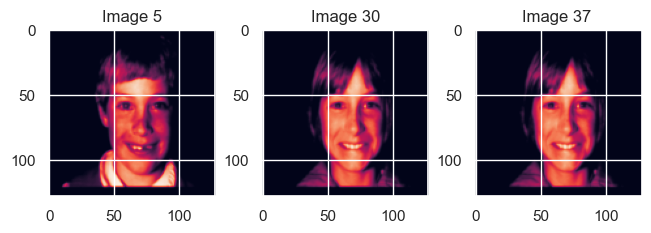

In [68]:
plot_3_images(X,5, 30 , 37)

Para estas imagenes podemos ver que los rasgos al rededor de sus labios y sus mejillas son muy sililares 

In [47]:
sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[4]))

[(24, array([ 0.03682138, -0.02108131, -0.22032874])),
 (36, array([ 0.12626547,  0.04442272, -0.06477083])),
 (26, array([ 0.07107741,  0.11457346, -0.31474893])),
 (15, array([ 0.2072921 , -0.07181223, -0.0476377 ])),
 (30, array([ 0.19439173,  0.01445925, -0.02041836])),
 (9, array([0.20967632, 0.09183506, 0.01687398])),
 (28, array([-0.03363393, -0.0873479 , -0.04777686])),
 (10, array([-0.05830552,  0.01452566, -0.06431473])),
 (20, array([ 0.09853689, -0.25693243, -0.10402833])),
 (17, array([-0.02884023, -0.15655514, -0.07722401])),
 (7, array([0.05388991, 0.01011302, 0.03525359])),
 (35, array([-0.0957826 , -0.12537262, -0.12102663])),
 (37, array([ 0.18384432,  0.28734811, -0.28111241])),
 (13, array([ 0.41133278, -0.2015324 , -0.22607315])),
 (14, array([-0.05131631,  0.00838306,  0.01188056])),
 (11, array([ 0.24666447, -0.15419145,  0.05086755])),
 (33, array([-0.15475844,  0.06450418, -0.30287684])),
 (8, array([0.19720045, 0.09567758, 0.08307881])),
 (5, array([ 0.1659162

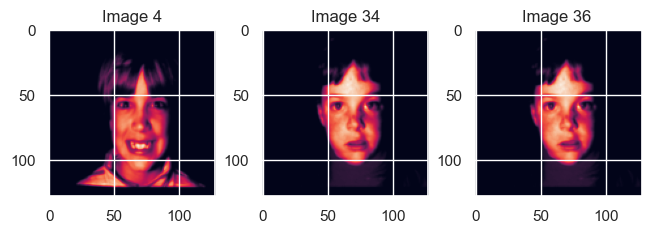

In [54]:
plot_3_images(X,4, 34 , 36)

En estas imagens podemos ver que el factor en comun es la forma del cabellos y como se parte un poco a la mitad

### Concluciones

1- Podemos ver que las ultimas dos son iguales y la primera muestra ciertos rascos de parentesco.
2- Los resultados obtenidos utilizando la técnica de K-means para la clasificación de rostros sugieren que esta metodología puede ser una herramienta útil.
3 - El uso de K-means para la clasificación de rostros permitió identificar patrones y características relevantes en los datos.